<a href="https://colab.research.google.com/github/HITesh-20/ML_internship-Project/blob/master/ML_internship_studio_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML INTERNSHIP PROJECT**

**submitted by : HITESH SRIVASTAVA (hiteshsrivastava8122573@gmail.com)**

**Project Title:**

**Marketing Campaign for Banking Products**

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

**Objective**:

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc**

**READ FILE**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling 1.xlsx to Bank_Personal_Loan_Modelling 1.xlsx


**Data Description:**

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

In [ ]:
df=pd.read_excel('Bank_Personal_Loan_Modelling 1.xlsx')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**Attribute Information:**

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

**DATA TYPE OF EACH COLUMN**

In [ ]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**STATISTICAL DETAILS**

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**INFORMATION: COUNT OF NULL**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**SHAPE OF DATA**

In [ ]:
df.shape

(5000, 14)

# **2. Check if you need to clean the data for any of the variables**

**HANDLING MISSING DATA**

In [ ]:
print("\n\nBEFORE HANDLING MISSING DATA\n",df.isnull().sum())
df.fillna(df.mean(),inplace=True)
print("\n\nAFTER HANDLING MISSING DATA\n",df.isnull().sum())
print("\n\nSHAPE OF DATASET",df.shape,"\n\n")



BEFORE HANDLING MISSING DATA
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


AFTER HANDLING MISSING DATA
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


SHAPE OF DATASET (5000, 14) 




**There is an outliers in Income column but when we are removing outliers then 
the column with Personal Loan=1 gets removed with the outliers.
So we should not remove outliers in this project**

In [ ]:
df[df<0].count()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

**CONVERTING -1,-2 AND -3 INTO THE MEDIAN OF EXPERIENCE**

In [ ]:
a=df['Experience'].median()
df['Experience']=df['Experience'].replace([-1,-2,-3],a)
df.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [ ]:
df.to_excel("abc.xlsx")

# **3. EDA: Study the data distribution in each attribute and target variable, share your findings**

**● Number of unique in each column?**

In [ ]:
unique_value=df.nunique()
unique_value

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**● Number of people with zero mortgage?**

In [ ]:
mortgage=df['Mortgage'].value_counts()[0]
mortgage

3462

**● Number of people with zero credit card spending per month?**

In [ ]:
print("NUMBER OF PEOPLE WITH 0 SPENDING PER MONTH:",df['CCAvg'].value_counts()[0])
print("NUMBER OF PEOPLE WITH NO CREDIT CARD:",df['CreditCard'].value_counts()[0])
print("AVERAGE SPENDING PER MONTH:",df.groupby(df['CreditCard']).mean()['CCAvg'][0])
print("SUM OF SPENDING PER MONTH:",df.groupby(df['CreditCard']).sum()['CCAvg'][0])

NUMBER OF PEOPLE WITH 0 SPENDING PER MONTH: 106
NUMBER OF PEOPLE WITH NO CREDIT CARD: 3530
AVERAGE SPENDING PER MONTH: 1.9454532577903745
SUM OF SPENDING PER MONTH: 6867.450000000022


**● Now we will find the Value counts of our Categorical columns**

In [ ]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

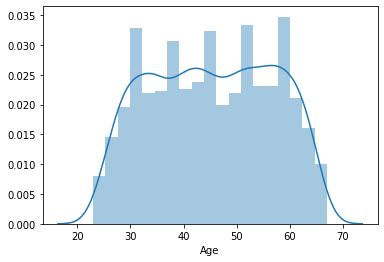

In [ ]:
sns.distplot(df['Age'],kde=True)

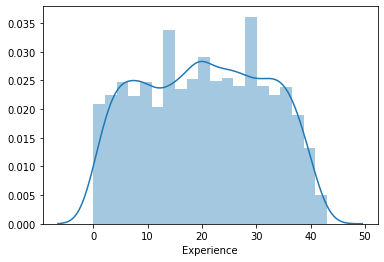

In [ ]:
sns.distplot(df['Experience'])

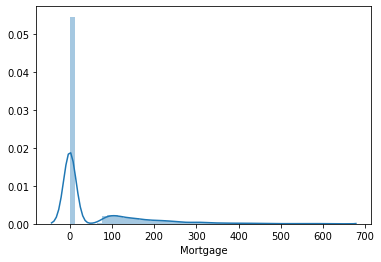

In [ ]:
sns.distplot(df['Mortgage'])

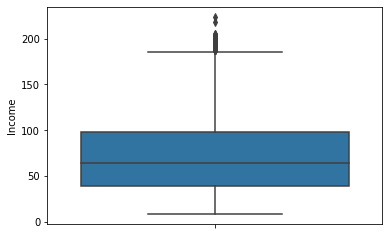

In [ ]:
sns.boxplot(df['Income'],orient='vertical')

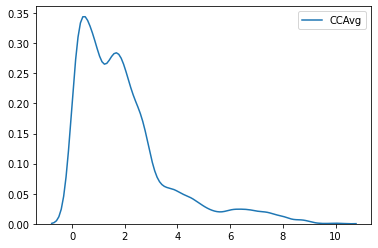

In [ ]:
sns.kdeplot(df['CCAvg'])

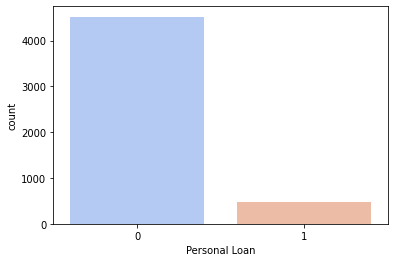

In [ ]:
sns.countplot(df['Personal Loan'],palette='coolwarm')

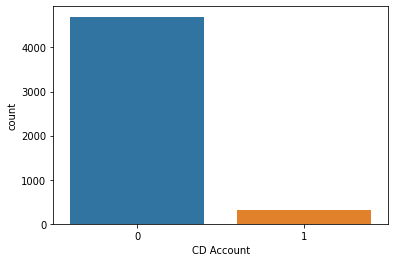

In [ ]:
sns.countplot(df['CD Account'])

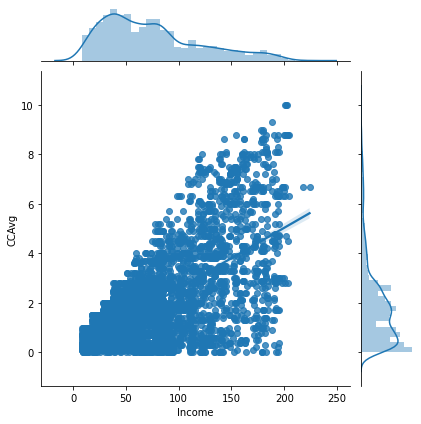

In [ ]:
sns.jointplot(x='Income',y='CCAvg',data=df,kind='reg')

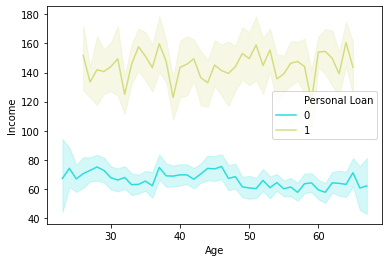

In [ ]:
sns.lineplot(x="Age", y="Income",hue='Personal Loan',data=df,palette='rainbow')

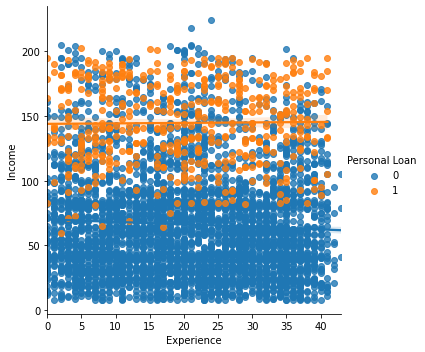

In [ ]:
sns.lmplot(x='Experience',y='Income',hue='Personal Loan',data=df)

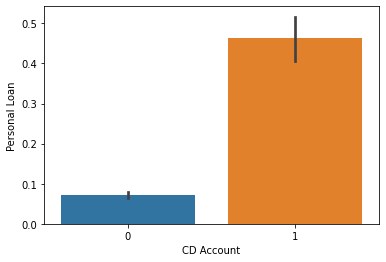

In [ ]:
sns.barplot(x='CD Account', y='Personal Loan',data=df)

**MULTIVARIATE**

In [ ]:
sns.pairplot(df, palette='coolwarm')

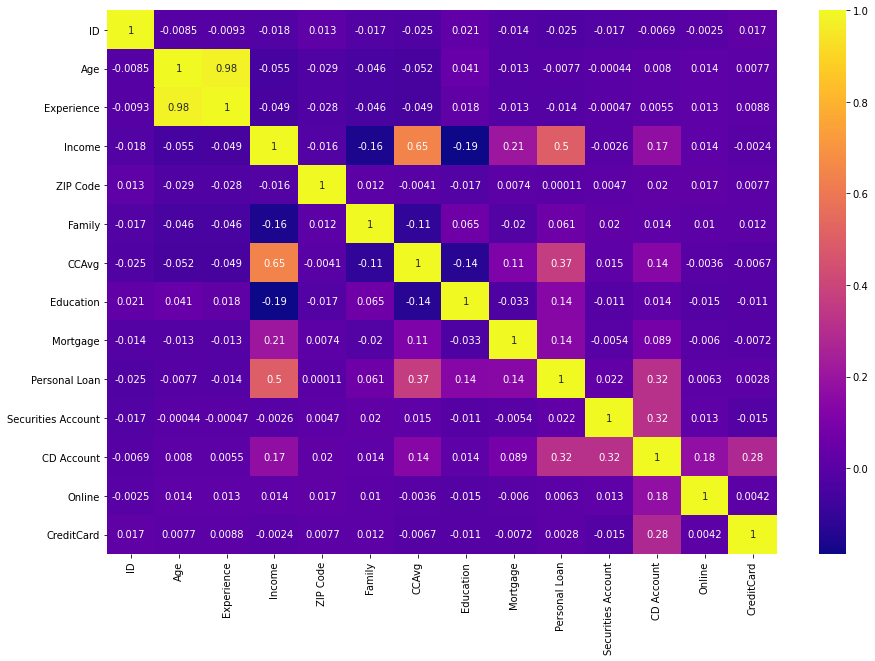

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma',annot=True)

Age and Experience features have very high correlation, 0.99. It is also intuitively understandable that experience increases as age increases. Correlated features degrade the learning performance and causes instability on the models.

# **4. Apply necessary transformations for the feature variables**

# **5. Train-Test Dataset split & Feature Inspection and Transformation**

**ONE HOT ENCODING**

In [ ]:
df1=df[['Age','Experience','Income','Family','CCAvg','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']]
df1=pd.concat([df1,pd.get_dummies(df['Education'])], axis=1)
df1=df1.rename({1:"Undergrad",2:"Graduate",3:"Advanced/Professional"},axis='columns')
df1.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Undergrad,Graduate,Advanced/Professional
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


**FEATURE SELECTION**

In [ ]:
x=df1.drop(["Personal Loan","Age"],axis='columns')
x.head()

,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Undergrad,Graduate,Advanced/Professional
0,1,49,4,1.6,0,1,0,0,0,1,0,0
1,19,34,3,1.5,0,1,0,0,0,1,0,0
2,15,11,1,1.0,0,0,0,0,0,1,0,0
3,9,100,1,2.7,0,0,0,0,0,0,1,0
4,8,45,4,1.0,0,0,0,0,1,0,1,0


In [ ]:
y=df1['Personal Loan']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

**SPLITTING DATA INTO TRAIN AND TEST DATASET**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print ('the shape of the features train set:', x_train.shape,'\nthe shape of the target train set:' ,y_train.shape)
print ('the shape of the feature test set:', x_test.shape,'\nthe shape of the target test set:',y_test.shape)

the shape of the features train set: (3500, 12) 
the shape of the target train set: (3500,)
the shape of the feature test set: (1500, 12) 
the shape of the target test set: (1500,)


Now, let's check each of our Numerical & Ordinal Categorical features in train_X set for Skewness and Outliers. Outliers affect the learning performance thus it is very essential to perform Outlier analysis for each feature, one-by-one. For each feature, we will check two plot, Normalized histogram using distplot() to check Skewness and Boxplot to check for Outliers.Then, for Skewed data, we will apply suitable Transformation to remove the Outliers and reduce the Skewness. Outliers Analysis is not reauired for other Nominal or Binary Categorical features.

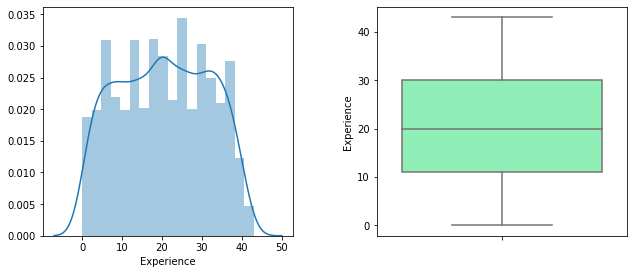

In [ ]:
# Feature 1: 'Experience' is our Numerical Interval data.

fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(x_train["Experience"],ax=axes[0]);
sns.boxplot(x_train["Experience"],orient="vertical",palette="rainbow",ax=axes[1])
fig.tight_layout(pad=5.0)

There are no Outliers for the 'Experience' feature.

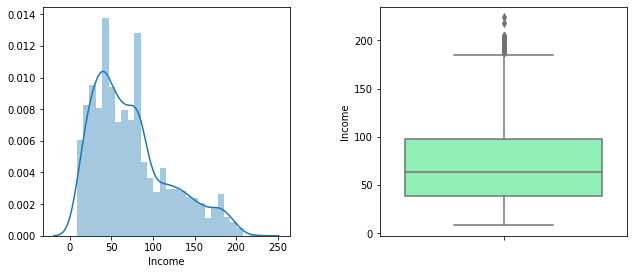

In [ ]:
# Feature 2: 'Income' is our Numerical Interval data.

fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(x_train["Income"],ax=axes[0]);
sns.boxplot(x_train["Income"],orient="v",palette="rainbow",ax=axes[1]);
fig.tight_layout(pad=5.0)

Now, we have a highly skewed Distribution of Income feature. It can be classified as a log-normal distribution which means if we apply log transformation to Income, resulting distribution will be similar to a Gaussian. We will use Yeo-Johnson method from scikit-learn, PowerTransformer. The reuslting distribution is as shown below:

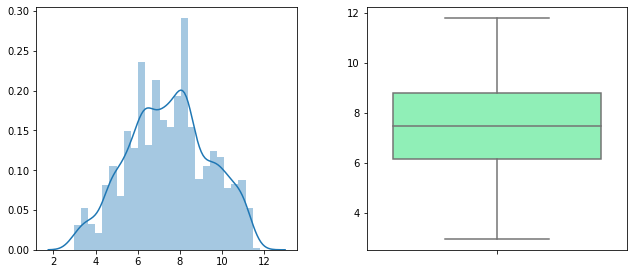

In [ ]:
pt_income = PowerTransformer(method="yeo-johnson", standardize=False)
pt_income.fit(x_train["Income"].values.reshape(-1, 1))
pti = pt_income.transform(x_train["Income"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(pti, ax=axes[0]);
sns.boxplot(pti,orient="v",palette="rainbow",ax=axes[1])
fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'Income' feature is no longer skewed and there are no Outliers as well.

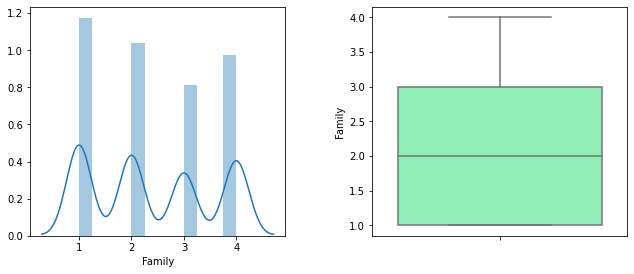

In [ ]:
# Feature 3: 'Family' is our Ordinal Categorical data.

fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(x_train["Family"],ax=axes[0]);
sns.boxplot(x_train["Family"],orient="v",palette="rainbow",ax=axes[1])
fig.tight_layout(pad=5.0)

There are no Outliers for the 'Family' feature

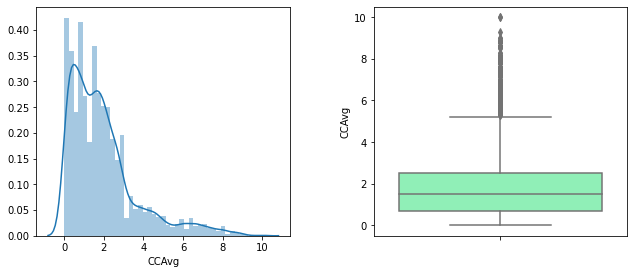

In [ ]:
# Feature 4: 'CC Avg' is our Numerical Interval data.

fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(x_train["CCAvg"],ax=axes[0]);
sns.boxplot(x_train["CCAvg"],orient="v",palette="rainbow",ax=axes[1])
fig.tight_layout(pad=5.0)

Now, similar to 'Income' feature, we again have a left skewed Distribution of CC Avg feature which has a log-normal distribution. We will use the same Yeo-Johnson method from scikit-learn, PowerTransformer to apply log transformation to Income, resulting distribution will be similar to a Gaussian. The resulting distribution is as shown below:

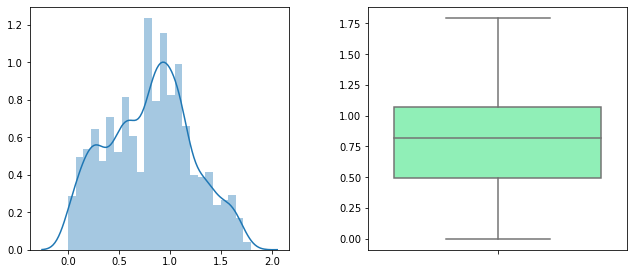

In [ ]:
pt_ccavg=PowerTransformer(method="yeo-johnson",standardize=False)
pt_ccavg.fit(x_train["CCAvg"].values.reshape(-1,1))
ptc=pt_ccavg.transform(x_train["CCAvg"].values.reshape(-1,1))

fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(ptc,ax=axes[0]);
sns.boxplot(ptc,orient="v",palette="rainbow",ax=axes[1])
fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'CC Avg' feature is no longer skewed and there are no Outliers as well

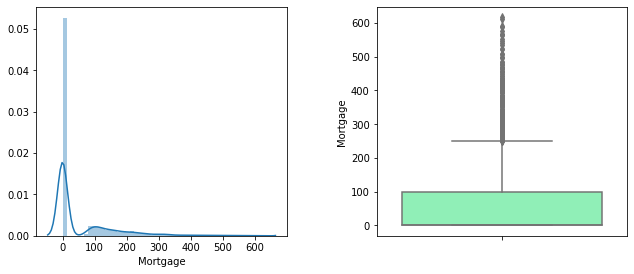

In [ ]:
# Feature 5: 'Mortgage' is our Numerical Interval data.

fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(x_train["Mortgage"],ax=axes[0]);
sns.boxplot(x_train["Mortgage"],orient="v",palette="rainbow",ax=axes[1])
fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'Mortgage' feature is highly skewed and there are a lot of Outliers as well. We can construct an ordinal categorical feature int_mortgage using Mortgage feature and then drop Mortgage feature. Same procedure will be applied to x_test as well

In [ ]:
x_train["Mortgage"]=pd.cut(x_train["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

x_test["Mortgage"]=pd.cut(x_test["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
x_train.head()

,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Undergrad,Graduate,Advanced/Professional
1334,22,35,2,1.3,0,0,0,1,0,1,0,0
4768,14,39,1,2.0,0,0,0,1,0,0,1,0
65,35,131,1,3.8,0,0,0,1,1,1,0,0
177,3,65,4,1.8,2,0,0,0,0,0,1,0
4489,13,21,3,0.2,0,0,0,1,0,0,1,0


The remaining features are Binary Categorical. Thus, no Outlier Analysis is required.

Now let's perform 'Standardization' on our Dataset to increase our learning performance. StandardScaler of scikit-learn will be used. A StandardScaler is fit to the feature in X_train, then this scaler transforms the same feature in X_train and X_test. This process is repeated for all features.

**STANDARDIZATION**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler() 
rescaled_train = scaler.fit_transform(x_train)
x_train.head()

,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Undergrad,Graduate,Advanced/Professional
1334,22,35,2,1.3,0,0,0,1,0,1,0,0
4768,14,39,1,2.0,0,0,0,1,0,0,1,0
65,35,131,1,3.8,0,0,0,1,1,1,0,0
177,3,65,4,1.8,2,0,0,0,0,0,1,0
4489,13,21,3,0.2,0,0,0,1,0,0,1,0


In [ ]:
rescaled_test = scaler.fit_transform(x_test)
x_test.head()

,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Undergrad,Graduate,Advanced/Professional
2764,5,84,1,2.9,1,0,0,0,1,0,0,1
4767,9,45,3,0.9,1,1,0,0,0,1,0,0
3814,9,35,3,1.3,0,0,0,0,0,1,0,0
3499,23,114,1,0.3,2,0,0,1,0,1,0,0
2735,12,70,3,2.6,1,0,0,1,0,0,1,0


# **6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.**

**LOGISTIC REGRESSION**

In [ ]:
#Build and train the Logistic(liblinear) Regression model
model1=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
y_pred1=model1.predict(x_test)
a1=metrics.accuracy_score(y_test,y_pred1)

#Build and trian the Logistic() Regression model
model2=LogisticRegression(C=0.01,solver='sag').fit(x_train,y_train)
y_pred2=model2.predict(x_test)
a2=metrics.accuracy_score(y_test,y_pred2)

#Build and train the Logistic() Regression model
model3=LogisticRegression(C=0.01,solver='saga').fit(x_train,y_train)
y_pred3=model3.predict(x_test)
a3=metrics.accuracy_score(y_test,y_pred3)

#Build and train the Logistic() Regression model
model4=LogisticRegression(C=0.01,solver='newton-cg').fit(x_train,y_train)
y_pred4=model4.predict(x_test)
a4=metrics.accuracy_score(y_test,y_pred4)

#Build and train the Logistic() Regression model
model5=LogisticRegression(C=0.01,solver='lbfgs').fit(x_train,y_train)
y_pred5=model5.predict(x_test)
a5=metrics.accuracy_score(y_test,y_pred5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**ACCURACY OF EACH AND EVERY MODEL OF LOGISTIC REGRESSION**

In [ ]:
print('Accuracy of LR model with liblinear solver',a1*100)
print('Accuracy of LR model with sag solver',a2*100)
print('Accuracy of LR model with saga solver',a3*100)
print('Accuracy of LR model with newton-cg solver',a4*100)
print('Accuracy of LR model with lbfgs solver',a5*100)

Accuracy of LR model with liblinear solver 90.93333333333334
Accuracy of LR model with sag solver 90.73333333333333
Accuracy of LR model with saga solver 89.8
Accuracy of LR model with newton-cg solver 92.86666666666666
Accuracy of LR model with lbfgs solver 92.86666666666666


**Logistic Regression with liblinear solver gives the best accuracy**

In [ ]:
print("The label missing in the LR model with lbfgs solver",set(y_test)-set(y_pred5))

The label missing in the LR model with lbfgs solver set()


**7. Print all the metrics related for evaluating the model performance**

**CONFUSION MATRIX**

In [ ]:
print("\nCONFUSION MATRIX\n",confusion_matrix(y_test,y_pred5))


CONFUSION MATRIX
 [[1328   23]
 [  84   65]]


**CLASSIFICATION REPORT**

In [ ]:
print("\nREPORT\n",classification_report(y_test,y_pred5))


REPORT
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1351
           1       0.74      0.44      0.55       149

    accuracy                           0.93      1500
   macro avg       0.84      0.71      0.75      1500
weighted avg       0.92      0.93      0.92      1500



**TRAIN AND TEST SET ACCURACY**

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train,model5.predict(x_train))*100)
print("Test set Accuracy: ", metrics.accuracy_score(y_test,y_pred5)*100)

Train set Accuracy:  93.71428571428572
Test set Accuracy:  92.86666666666666


**CALCULATE:**

**F SCORE**

**LOG LOSS**

**JACCARD INDEX**

In [ ]:
# Calculate the f1 score
f1_lr=f1_score(y_test,y_pred5,average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_lr=jaccard_similarity_score(y_test, y_pred5)

# Calculate Log loss
yhat_lr_prob = model5.predict_proba(x_test)
ll_lr=log_loss(y_test,yhat_lr_prob)

print('f1 score:',f1_lr)
print('Jaccard index:',jsc_lr)
print('Log Loss:',ll_lr)

f1 score: 0.9202740676602054
Jaccard index: 0.9286666666666666
Log Loss: 0.16448237206417946


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


**YOU CAN ALSO PREDICT BY INSERTING YOUR VALUES**

In [ ]:
a=int(input("EXPERIENCE:"))
b=int(input("INCOME:"))
c=int(input("FAMILY:"))
d=float(input("CCAVG:"))
e=int(input("MORTGAGE(0/1):"))
f=int(input("SECURITIES ACCOUNT(0/1):"))
g=int(input("CD ACCOUNT(0/1):"))
h=int(input("ONLINE(0/1):"))
i=int(input("CREDIT CARD(0/1):"))
j=int(input("UNDERGRAD(0/1):"))
k=int(input("GRADUATE(0/1):"))
l=int(input("ADVANCED/PROFESSIONAL(0/1):"))


'\na=int(input("EXPERIENCE:"))\nb=int(input("INCOME:"))\nc=int(input("FAMILY:"))\nd=float(input("CCAVG:"))\ne=int(input("MORTGAGE(0/1):"))\nf=int(input("SECURITIES ACCOUNT(0/1):"))\ng=int(input("CD ACCOUNT(0/1):"))\nh=int(input("ONLINE(0/1):"))\ni=int(input("CREDIT CARD(0/1):"))\nj=int(input("UNDERGRAD(0/1):"))\nk=int(input("GRADUATE(0/1):"))\nl=int(input("ADVANCED/PROFESSIONAL(0/1):"))\n'

In [ ]:
z=model5.predict([[a,b,c,d,e,f,g,h,i,j,k,l]])
print("PREDICTED:",z)

# **8. Build various other classification algorithms and compare their performance**

**SVM**

In [ ]:
svm=svm.SVC(kernel='linear').fit(x_train, y_train)
svm_pred=svm.predict(x_test)
svm_acc=metrics.accuracy_score(y_test,svm_pred)
svm_j=jaccard_similarity_score(y_test,svm_pred)
svm_f=f1_score(y_test,svm_pred,average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


**RANDOM FOREST CLASSIFIER**

In [ ]:
rfc=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
rfc_acc=metrics.accuracy_score(y_test,rfc_pred)
rfc_j=jaccard_similarity_score(y_test,rfc_pred)
rfc_f=f1_score(y_test,rfc_pred,average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


**NAIVE BAYES CLASSIFIER**

In [ ]:
nbc=GaussianNB().fit(x_train,y_train)
nbc_pred=nbc.predict(x_test)
nbc_acc=metrics.accuracy_score(y_test,nbc_pred)
nbc_j=jaccard_similarity_score(y_test,nbc_pred)
nbc_f=f1_score(y_test,nbc_pred,average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


**COMPARISON**

In [ ]:
Jaccard=[svm_j,rfc_j,nbc_j]
F1_score=[svm_f,rfc_f,nbc_f]
Accuracy=[svm_acc*100,rfc_acc*100,nbc_acc*100]

df = {'Algorithm': ['SVM', 'Random Forest Classifier','Naive Bayes'],
     'Jaccard': Jaccard, 'F1-score': F1_score, 'Accuracy':Accuracy}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'Accuracy'], index=None)
Report

,Algorithm,Jaccard,F1-score,Accuracy
0,SVM,0.959333,0.955326,95.933333
1,Random Forest Classifier,0.982000,0.981450,98.200000
2,Naive Bayes,0.883333,0.890974,88.333333


9.